# Cyclin dependent kinase 2 ligands for pharmacophore identification

We explore cdk2 ligands that will be used to create ligand-based pharmacophore models

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
import openpharmacophore as oph
from pprint import pprint
import nglview as nv

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

In [3]:
lig_df = pd.read_csv("ligands.csv")
lig_df

,Smiles,PDBID,LigID
0,C[C@@]12[C@@H]([C@@H](C[C@@H](O1)n3c4ccccc4c5c...,1AQ1,STU
1,c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3...,1FIN,ATP
2,COc1cc2c(cc1OC)ncnc2Nc3cccc(c3)O,1DI8,DTQ
3,c1ccnc(c1)NS(=O)(=O)c2ccc(cc2)NCC3=C4c5c(ncs5)...,1FVV,107
4,C1CCC(CC1)COc2c(c(nc(n2)N)N)N=O,1E1X,NW1
5,c1[nH]c2c(n1)c(nc(n2)N)OCC3CCCCC3,1E1V,CMG


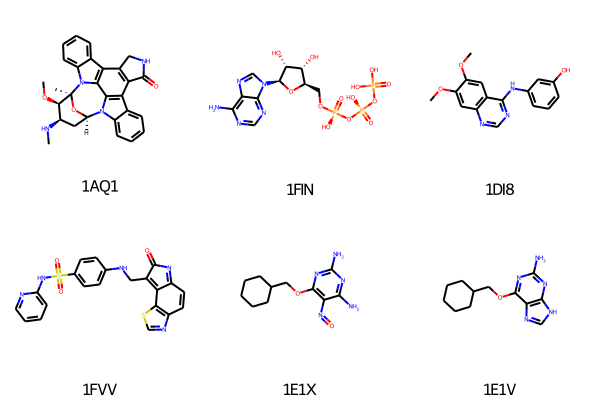

In [5]:
ligands = [Chem.MolFromSmiles(smi) for smi in lig_df["Smiles"]]
legends = [l for l in lig_df["PDBID"]]
Draw.MolsToGridImage(ligands, legends=legends, molsPerRow=3)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

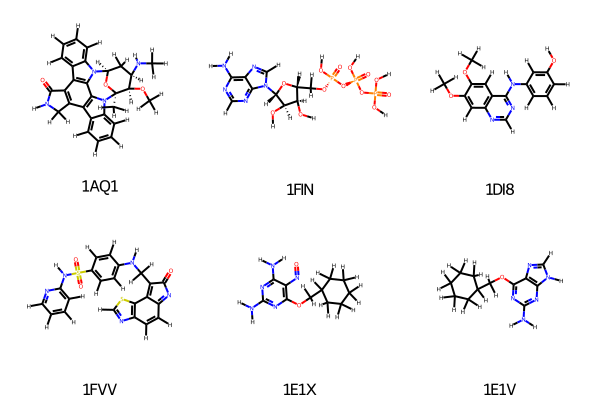

In [6]:
# Add hydrogens and draw them again

pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

Draw.MolsToGridImage(pharmacophore.ligands, legends=legends)

In [7]:
pharmacophore.generate_conformers(ligands="all", n_confs=10)

## View 3D structures

In [13]:
index = 5
nv.show_rdkit(pharmacophore.ligands[index])

NGLWidget()

## Extracting common pharmacophores

We extract common pharmacophores via recursive distance partitioning algorithm